# _EDA: Panacea Lab Twitter Data_

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
from pathlib import Path
from tqdm.autonotebook import tqdm
tqdm.pandas()
%config InlineBackend.figure_format='retina'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
def load_data():
    datapath = Path.cwd() / 'playground_data' / 'panacealab_2020-04-11_clean-dataset.pkl'
    df = pd.read_pickle(datapath)
    return df

In [4]:
df = load_data()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827251 entries, 0 to 827250
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype              
---  ------                        --------------   -----              
 0   created_at                    827251 non-null  datetime64[ns, UTC]
 1   favorite_count                827251 non-null  int64              
 2   full_text                     827251 non-null  object             
 3   id_str                        827251 non-null  object             
 4   in_reply_to_screen_name       827251 non-null  object             
 5   in_reply_to_status_id_str     827251 non-null  object             
 6   is_quote_status               827251 non-null  bool               
 7   lang                          827251 non-null  object             
 8   retweet_count                 827251 non-null  int64              
 9   user                          827251 non-null  object             
 10  quoted_status_id_str

In [6]:
# drop user column (forgot to drop when cleaning data set, will need to address in future datasets)
df.drop('user', axis=1, inplace=True)

# `created_at`

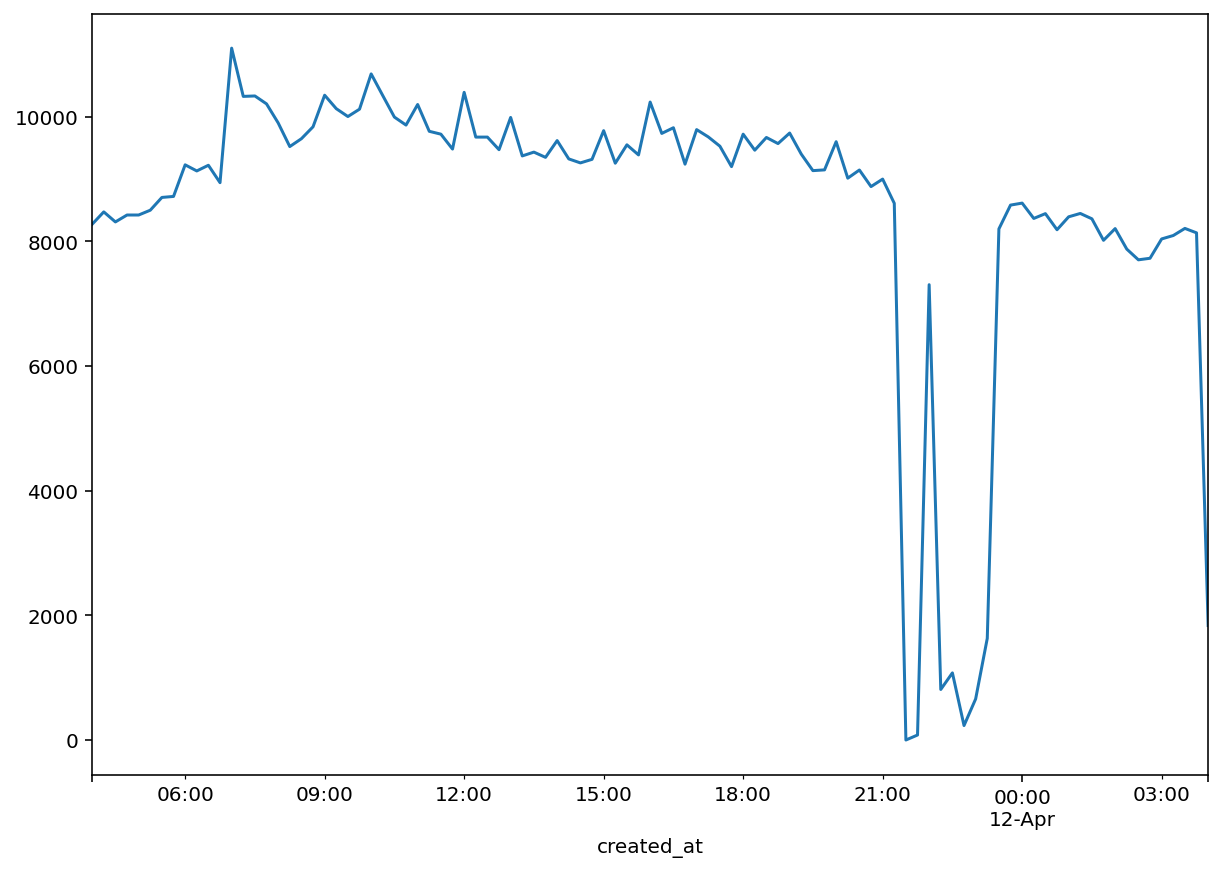

In [7]:
df.set_index('created_at')['full_text'].resample('15min').count().plot(figsize=(10,7));

### _Observations_

Looks like there may have been a disruption in there data gathering process for ~2.5 hours or so. I'll firstly need to consult their GitHub to see if there are any information why there is this discrepancy. Going forward, I'll also need to be cognizant of this in other data sets (which also may depend on any information I gather via GitHub).

# `favorite_count`

In [8]:
#!pip install altair
import matplotlib.pyplot as plt

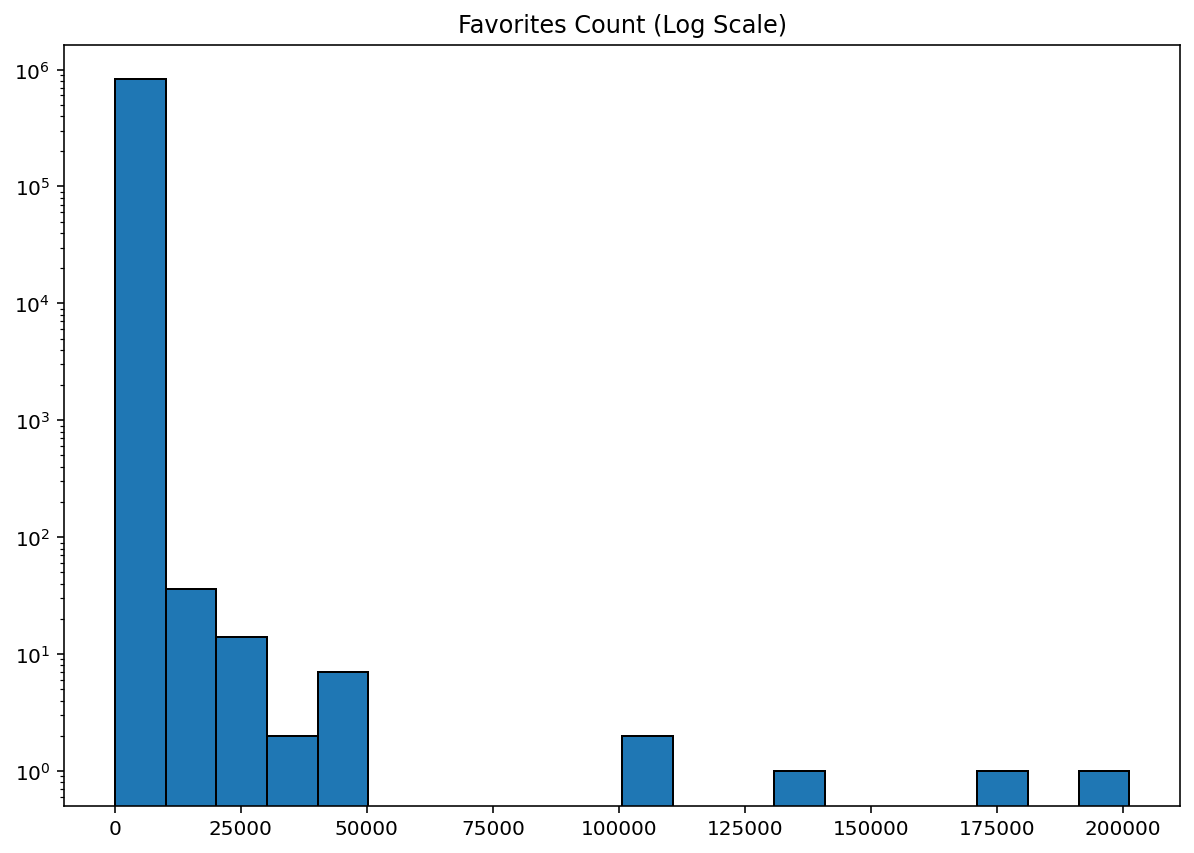

In [9]:
plt.figure(figsize=(10,7))
plt.hist(df['favorite_count'], log=True, bins=20, edgecolor='black')
plt.title(r'Favorites Count (Log Scale)');

### _Observation_

Without the log scale, the graph is a single bar right at `0`. Vast majority of the Tweets don't have all too many likes, which isn't too surprising. In a way, it lends credence to the notion that the data is more or less representative of what you'd see on Twitter. (Note - I'm not saying it is a representative sample; it is too soon to confidently proclaim that.)

# `id_str`

In [10]:
# how many unique ID values are there? 
len(df['id_str'].unique()) 

827249

### _Observations_

Each tweet gets a unique identifier, and the above number represents that on this particular day, there are `827,249` unique Tweets.

# `is_quote_status`

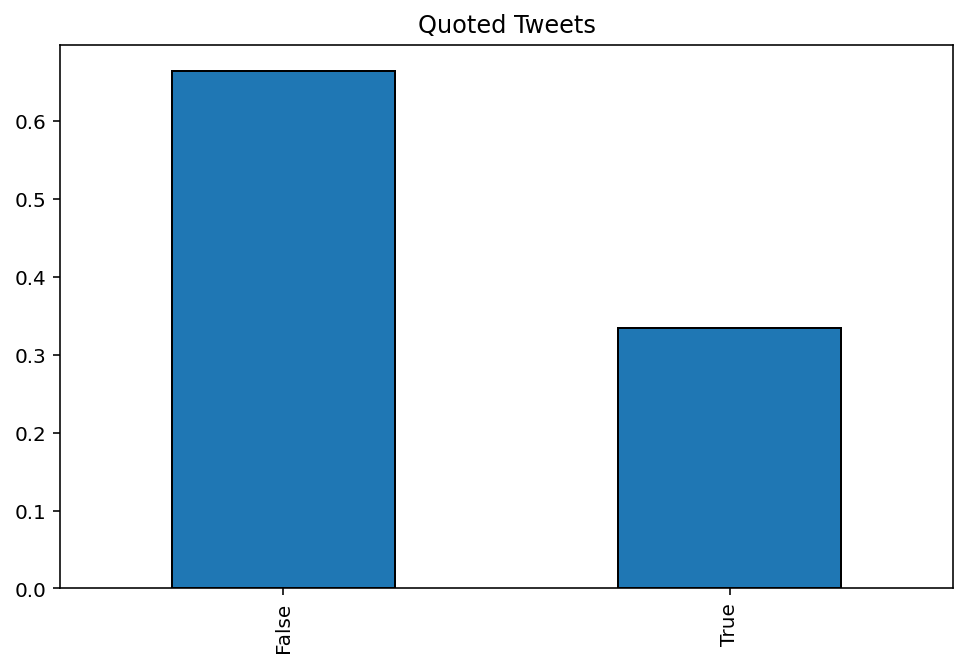

In [11]:
df['is_quote_status'].value_counts(normalize=True).plot\
.bar(title=r'Quoted Tweets', figsize=(8,5), edgecolor='black');

### _Observations_

A quoted Tweet is when, instead of simply 'retweeting' another user's Tweet, a user adds their own commentary in addition to retweeting another user's Tweet. With this data, it looks like ~65% of the Tweets are not quoted tweets. This seems a little on the lower side (I was expecting the number of original Tweets, i.e. the above stated percentage, to be higher). However, this is more of a hunch; the ratio we see above of a roughly 65/35 split between original and quoted tweets doesn't seem unusual. 

# `lang`

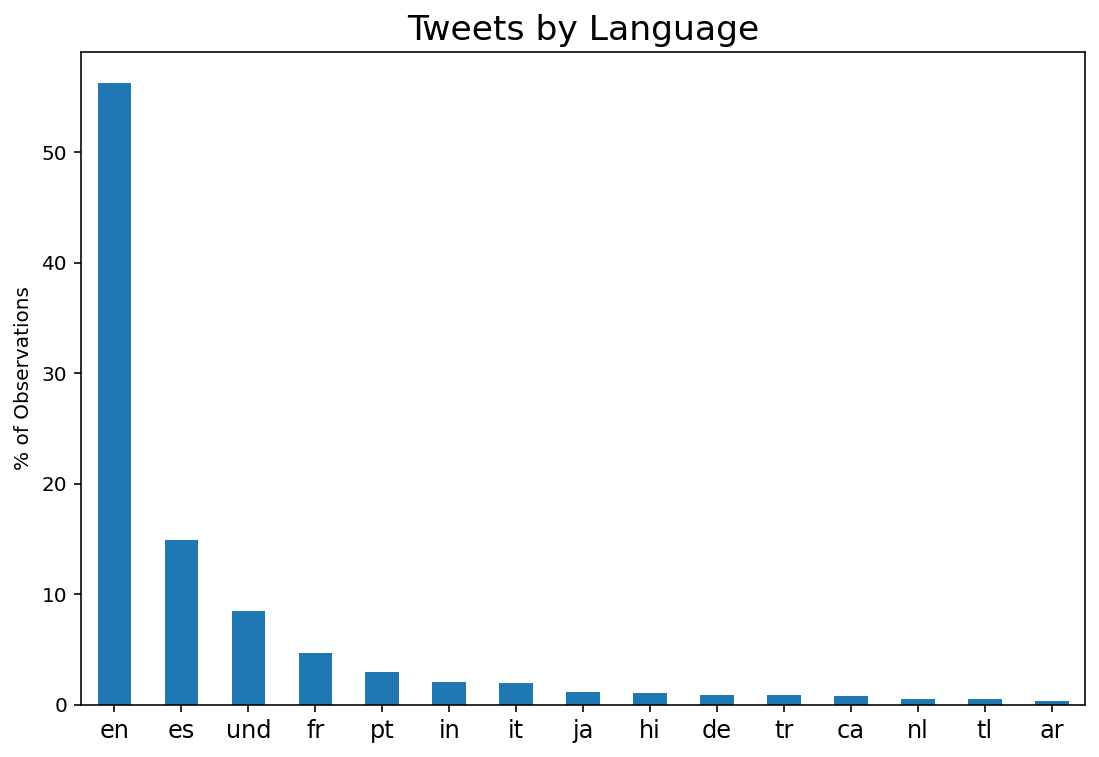

In [12]:
plt.figure(figsize=(9,6))
round(df['lang'].value_counts(normalize=True)[:15] * 100, 4).plot.bar()
kwargs = {'fontsize':'large'}
plt.xticks(rotation=0, **kwargs)
plt.ylabel('% of Observations')
plt.title(r'Tweets by Language', size='xx-large');

### _Observations_

Well over 50% of the Tweets are in English (i.e. `en`). The top three is rounded out with Spanish (i.e. `es`) at a little over 15%, and undefined (i.e. `und`) at just under 10%. The language component of this dataset presents a challenge that didn't exist within the `twint` data, in that we now have to deal with multiple languages. My gut instinct is telling me to focus on English-only right now. A "nice to have" may be to figure out if we could determine if there are any additional English Tweets that were listed as undefined. However, time is of the essence and it is not a primary focus at the moment because the value it would provide is currently minimal. 

# `retweet_count`

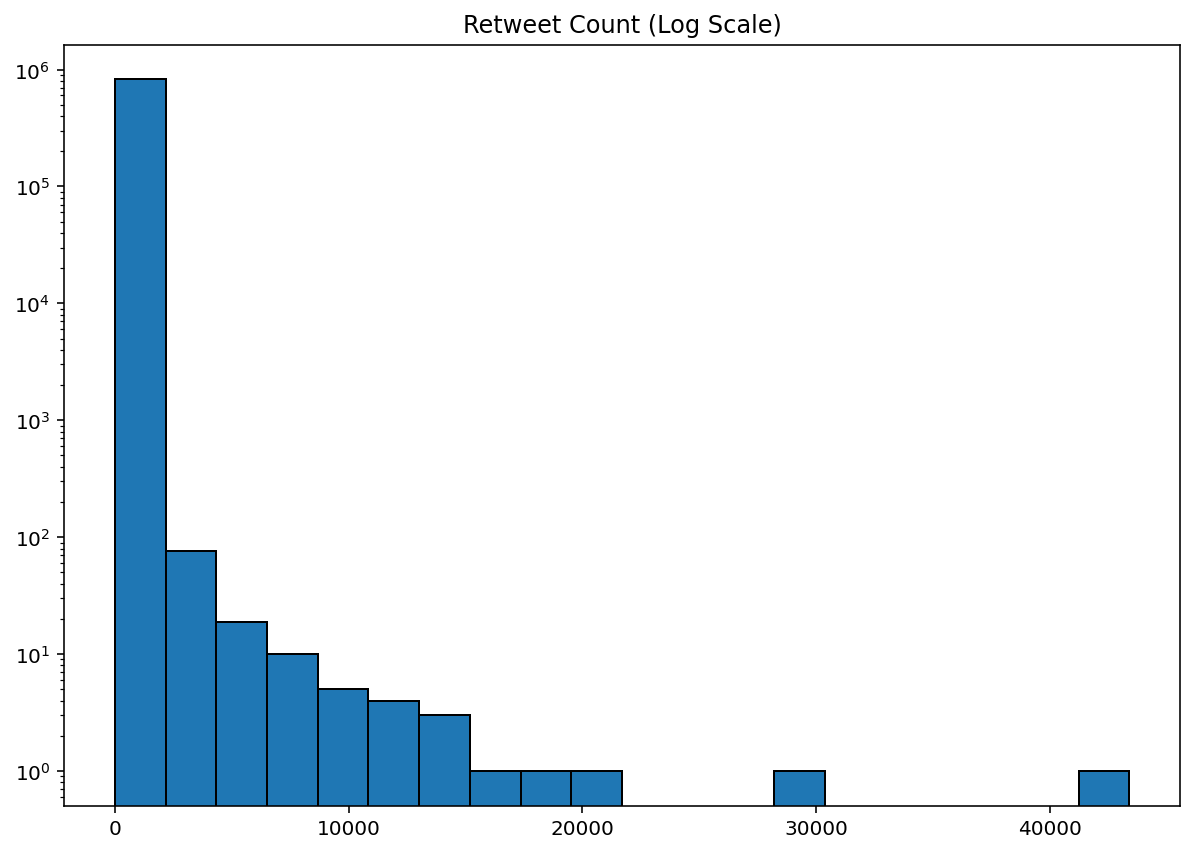

In [13]:
plt.figure(figsize=(10,7))
plt.hist(df['retweet_count'], log=True, bins=20, edgecolor='black')
plt.title(r'Retweet Count (Log Scale)');

### _Observations_

Similar to `favorite_count`, the vast majority of the Tweets within this data set have very minimal number of retweets with most likely have no retweets at all. Just an observation when we compare to the `favorite_count`; notice how the highest number of retweets is around `40,000` or so. This is in comparison to `favorite_count`, whose highest number bordered on `200,000`. So it seems like Tweets are more likely to be favorited than retweeted, which may be interesting to dive into further in the future. 

# `hashtags`

In [14]:
#plt.figure(figsize=(9, 7))
df['hashtags'].value_counts(ascending=False)[1:16]

COVID19                16106
coronavirus            11300
Coronavirus             5096
covid19                 3042
Covid19                 2913
PlusJamaisCa            1932
COVIDー19                1203
SmartNews                997
CoronavirusPandemic      637
CoronaVirus              620
coronavirus,COVID19      620
COVID19,coronavirus      592
coronavirus,covid19      572
COVID__19                555
FoxNews                  481
Name: hashtags, dtype: int64

### _Observations_

The first five hashtags are straightforward, the sixth one - `PlusJamaisCa` - is unusual though. Upon further investigation, it is French, and means `Never Again`. 

The hashtag below that - `COVIDー19` - is slightly deceptive as well. When trying to graph this value distribution, I kept getting a `RuntimeError` from matplotlib, basically saying that a certain type of text didn't exist. I remember a little while back that when the term COVID-19 usage first starting gaining traction a month or two ago, Tweets were including a Chinese version of the hashtag, which was with a dash that was slightly longer than usual. And this is what we have here. So it appears that this form of the hashtag is still being used.

The last interesting observation is the `FoxNews` hashtag. Apart from the French term, all the other terms are in the general form of Covid-19 or coronavirus. Fox News' coverage of the pandemic has been volatile; at the start, they largely pushed the message that it was either a hoax, or that is was nothing to worry about. They've changed their tone slightly since things started turning for the worst, but it would be interesting to investigate what the sentiment is for the Tweets that mention the `FoxNews` hashtag.

# `symbols`

In [19]:
df['symbols'].value_counts()[:15]

none          826542
EMPR             137
usdt,dai          60
GILD              27
AAPL,GOOGL         9
MTC                8
SPY                7
AAPL               7
BTC                7
INO                7
DIS                6
cydy               5
TSLA               5
hit                4
ARYC               4
Name: symbols, dtype: int64

### _Observations_

`symbols` are located within the `entities` dictionary within a Tweet object. As we can see above, they mostly seem to represent ticker symbols of public companies, like Apple (`AAPL`), Google (`GOOGL`), and Tesla (`TSLA`). However, with virtually all of our Tweets not containing any symbols, I don't know if this particular data point will provide any value. However, I hesitate to remove it because while the `symbol` data for this particular day may not be all that informative, it could help aid in the discovery of a trend for another day.

# `urls`

In [16]:
df['urls'].value_counts()[1:15]

https://t.co/GjO2cQotP0                            470
https://t.co/ID2no4vH8Y                            252
https://t.co/KJ757gP9il                            163
https://t.co/q1RnJHMsBn                            162
https://t.co/QmldC3mkmu,https://t.co/KwNkvtEsER    142
https://t.co/9xNucTNst5                            133
https://t.co/iipLAwN9XO                            129
https://t.co/as9Esz51J2                            127
https://t.co/7eBi6B4NVs                            123
https://t.co/DH9eQsJpEE                            119
https://t.co/0J2UdYHyh5                            118
https://t.co/jtKRoi6PGg                            116
https://t.co/t4M8GgNhsu                            113
https://t.co/lsQxJG6Xgv                            111
Name: urls, dtype: int64

### _Observations_

- First link is to compose a message via [Resistbot](https://twitter.com/resistbot)
- Second link wouldn't open correctly due to security issues with browser
- Third link was to an [article](https://www.thenational.scot/news/18351414.coronavirus-ionisers-may-key-fight-defeat-covid-19/) from [The National], which proclaims itself as a _"newspaper that supports an Independent Scotland"_
- Fourth link is to a [video](https://www.bitchute.com/video/YFPbH4907jo5/) on what looks to be a German website called bitchute.com; the title of the video is "DIE NEUE WELTORDNUNG (NWO) - UNBEDINGT ANSCHAUEN UND TEILEN!", or "THE NEW WORLD ORDER (NWO) - MUST SEE AND SHARE!"
- The two URLs in the fifth entry:
    - the first url is to a Nigerian website called 420loaded; upon an initial pass it appears to be a news-oriented website; however, it is interesting to note that their Twitter account has apparently been suspended
    - the second URL is to the 420loaded as well, to an article titled [_"News: US becomes the first country to mark 2,000 Coronavirus deaths in 24 hours with 500,000 cases"_](https://420loaded.com.ng/news-us-becomes-the-first-country-to-mark-2000-coronavirus-deaths-in-24-hours-with-500000-cases/)
- Sixth link is to a video on YouTube from [MSNBC](https://www.youtube.com/watch?v=j_XIF6JARCw) titled _'Liar': Trump Fact-Checked For Dangerous Coronavirus Claims | The Beat With Ari Melber | MSNBC_
- Seventh link is to another YouTube video, from user [Media Leaves Out](https://www.youtube.com/channel/UCQhhLX53nqHP3NI52MRHZbw), titled [_WHERE DID COVID 19 START?_](https://www.youtube.com/watch?v=p2DcbaiKrpU&t=2s)
    - name of user is Nathan Rich AKA _"Hotpot King"_
    - gives subtitles in what looks to be Chinese (also occasionally speaks Chinese at beginning)
    - video is conspiratorial in nature, attempting to link military games that took place in Wuhan in October 2019, vaping in America, and a medical research laboratory that was closed down last August
- Eighth link is to the website [LondonReal](https://londonreal.tv/), more specifically to an interview with [David Icke](https://www.davidicke.com/)
    - this is perhaps the most interesting link, as Icke is a "professional" conspiracy theorist
    - this video in particular is titled _"THE CORONAVIRUS CONSPIRACY: HOW COVID-19 WILL SEIZE YOUR RIGHTS & DESTROY OUR ECONOMY"_
- Ninth is in Spanish, and appears to be focused on healthcare professionals in Colombia at the front lines of the virus
- Tenth link is to an [article on brasil247.com](https://www.brasil247.com/brasil/embaixada-pede-que-italianos-deixem-o-brasil-o-mais-rapido-possivel-pelo-avanco-do-coronavirus), telling of Italian (?) Embassy in Brazil asking Italians to leave Brazil as soon as possible due to the coronavirus

Overall, `urls` looks like it has the potential to be extremely valuable in determining mis/disinformation.

# `user_mentions`

In [18]:
df['user_mentions'].value_counts()[:15]

none                          577038
realDonaldTrump                 5254
YouTube                         4731
nytimes                         1058
googlenews                       813
narendramodi                     761
BreitbartNews                    691
MattHancock                      612
MailOnline                       588
CNN                              565
el_pais                          559
WHO                              486
franceinfo                       473
WhiteHouse,realDonaldTrump       466
nypost                           452
Name: user_mentions, dtype: int64

### _Observations_

`user_mentions` also looks like it might be a good data point for discerning mis/disinformation. Most of the names are familiar, but there are a few that deserve to be pointed out (either becasue they may not be known by a large audience or they may be a more likely vector for distributing disinformation):
- [Breitbart News (@BreitbartNews)](https://twitter.com/BreitbartNews)
- [Matt Hancock (@MattHancock)](https://twitter.com/MattHancock) --> British Secretary of State for Health & Social Care
- [Narendra Modi (@narendramodi)](https://twitter.com/narendramodi) --> Prime Minister of India
- [Daily Mail (@MailOnline)](https://twitter.com/MailOnline)
- [El País (@el_pais)](https://twitter.com/el_pais) --> _A selection of the best content from the world’s leading Spanish-language daily_

# `tweet_source`

In [20]:
df['tweet_source'].value_counts()[:15]

Twitter for Android    242660
Twitter for iPhone     203479
Twitter Web App        168741
Twitter Web Client      51469
Twitter for iPad        25300
WordPress.com           20506
TweetDeck               13915
dlvr.it                 10779
IFTTT                   10491
Hootsuite Inc.           8971
Instagram                5634
Buffer                   4227
Paper.li                 3390
SocialFlow               2001
SocialNewsDesk           1734
Name: tweet_source, dtype: int64

### _Observations_

`tweet_source` represents what platform was used to send the Tweet. Overall, the top 15 sources are not surprising. However, it should be noted that some platforms can be used to send out content automatically; in essence, they are 'bot-like' in that they automate the Tweeting process. It is a data point worth consideration for further investigation. 

# _Assessement_

There are still some user related information (e.g. when the account was created, friend counts, etc.) that needs to be explored. However, the goal of this notebook was to assess the viability of [Panacea Lab's COVID-19 related Twitter data](http://www.panacealab.org/covid19/).

While not perfect, there seems to be a lot of value here. As a little background, Panacea started collecting tweets driven by the selection of certain keywords:

- `COVD19`
- `CoronavirusPandemic`
- `COVID-19`
- `2019nCoV`
- `CoronaOutbreak`
- `coronavirus`
- `WuhanVirus`
- `covid19`
- `coronaviruspandemic`
- `covid-19`
- `2019ncov`
- `coronaoutbreak`
- `wuhanvirus`

These keywords were exclusively used to grab tweets from Twitter's streaming API. They then allow individuals to gather a full dataset of a given day's tweet, or a cleaned version with no retweets (which we are using here). Additionally, they offer various other sources of data specifically for NLP tasks:

- Top 1000 frequent terms
- Top 1000 bigrams
- Top 1000 trigrams

In addition, they include general statistics for each day. Overall, there data gathering is impressive, and based on this EDA, I'm comfortable utilizing this as a resource for further research. 